In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os

TABULAR_PATH = 'data/tabular/'
data_files = os.listdir(TABULAR_PATH)
data_files

['Condition(State of Repair)oftheBuilding(ARMM, 2010)Brgy.xlsx',
 'Construction Materials of the Roof (ARMM 2015)Brgy.xlsx',
 'Construction Materials of the Walls(ARMM 2015).xlsx',
 'Floor Area (ARMM, 2010) Brgy.xlsx',
 'Household Population by Ethnicity (ARMM, 2010) Brgy.xlsx',
 'Main Source of Water Supply for Cooking (ARMM 2015) Brgy.xlsx',
 'Main Source of Water Supply for Drinking (ARMM 2015) Brgy.xlsx',
 'Number of Households by Kind of Fuel for Lighting (ARMM 2015) Brgy.xlsx',
 'Number of schools per brgy.xlsx',
 'Population 2010, 2015 ARMM,BCT.xlsx',
 'Tenure Status of the Lot (ARMM 2010) Brgy.xlsx',
 'Type of Building (ARMM 2015) Brgy.xlsx',
 'Year Built (ARMM 2010) Brgy.xlsx']

In [2]:
def get_info(df):
    info_df = df.describe(include='all').T
    info_df['dtypes'] = df.dtypes
    info_df['missing'] = df.isna().sum()
    return info_df

## Schools Data

In [3]:
schools_data = pd.read_excel(TABULAR_PATH+'Number of schools per brgy.xlsx')
print('Dimension:',schools_data.shape)
schools_data.head()

Dimension: (1570, 7)


,PROV,PSGC_PROV,CITY/MUNI,PSGC_CITY/MUNI,BRGY,PSGC_BRGY,Number of School
0,BASILAN,PH150700000,CITY OF LAMITAN (Capital),PH150702000,Arco,PH150702001,1
1,BASILAN,PH150700000,CITY OF LAMITAN (Capital),PH150702000,Ba-as,PH150702002,1
2,BASILAN,PH150700000,CITY OF LAMITAN (Capital),PH150702000,Balagtasan,PH150702005,1
3,BASILAN,PH150700000,CITY OF LAMITAN (Capital),PH150702000,Balas,PH150702006,1
4,BASILAN,PH150700000,CITY OF LAMITAN (Capital),PH150702000,Balobo,PH150702007,1


In [4]:
get_info(schools_data)

,count,unique,top,freq,mean,std,min,25%,50%,75%,max,dtypes,missing
PROV,1570,5,LANAO DEL SUR,522,NaN,NaN,NaN,NaN,NaN,NaN,NaN,object,0
PSGC_PROV,1570,5,PH153600000,522,NaN,NaN,NaN,NaN,NaN,NaN,NaN,object,0
CITY/MUNI,1570,117,PARANG,49,NaN,NaN,NaN,NaN,NaN,NaN,NaN,object,0
PSGC_CITY/MUNI,1570,118,PH156612000,39,NaN,NaN,NaN,NaN,NaN,NaN,NaN,object,0
BRGY,1570,1524,Poblacion,7,NaN,NaN,NaN,NaN,NaN,NaN,NaN,object,0
PSGC_BRGY,1570,1570,PH153638025,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,object,0
Number of School,1570,NaN,NaN,NaN,1.72675,1.43918,1,1,1,2,15,int64,0


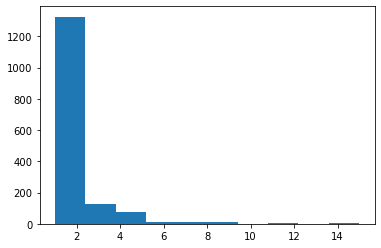

In [5]:
plt.hist(schools_data['Number of School'].values)
plt.show()

In [6]:
schools_data.groupby('PROV')['Number of School']\
            .sum()\
            .sort_values(ascending=False)

PROV
LANAO DEL SUR    978
MAGUINDANAO      709
SULU             479
TAWI-TAWI        304
BASILAN          241
Name: Number of School, dtype: int64

In [7]:
schools_data.groupby('CITY/MUNI')['Number of School']\
            .sum()\
            .sort_values(ascending=False)\
            .head(20)

CITY/MUNI
CITY OF MARAWI (Capital)           97
PARANG                             84
BONGAO (Capital)                   84
BACOLOD-KALAWI (BACOLOD GRANDE)    81
DATU ODIN SINSUAT (DINAIG)         64
BALINDONG (WATU)                   61
CITY OF LAMITAN (Capital)          61
SIASI                              58
BAYANG                             55
MASIU                              51
JOLO (Capital)                     49
UPI                                48
BINIDAYAN                          46
BALABAGAN                          43
SOUTH UPI                          43
TALIPAO                            42
WAO                                39
BARIRA                             39
SULTAN KUDARAT (NULING)            38
SUMISIP                            37
Name: Number of School, dtype: int64

In [8]:
schools_data.groupby('BRGY')['Number of School']\
            .sum()\
            .sort_values(ascending=False)\
            .head(20)

BRGY
Poblacion               38
Bongao Poblacion        15
Pindolonan              15
San Raymundo            13
Awang                   12
Lumbac                  12
Romangaob (Pob.)        11
Gadongan                 9
Asturias                 9
Ilian                    9
Raya                     9
Barira (Pob.)            9
Bagoaingud               8
Walled City (Pob.)       8
Basak Malutlut           8
Bualan                   8
Bus-bus                  8
Cadayonan                8
Landasan (Sarmiento)     8
Poblacion II             8
Name: Number of School, dtype: int64

## Population Data

In [9]:
population_data = pd.read_excel(TABULAR_PATH+'Population 2010, 2015 ARMM,BCT.xlsx')
population_data.head()

,REGI,PSGC_REGI,PROV,PSGC_PROV,MuniCities,PSGC_CITY/MUNI,BrgyName,PSGC_BRGY,BCT,Pop2010,...,80_abv_mal,num_hh0_fem.1,bel_20_hh0_fem,20-29_hh0_fem,30-39_hh0_fem,40-49_hh0_fem,50-59_hh0_fem,60-69_hh0_fem,70-79_hh0_fem,80_abv_fem
0,Autonomous Region In Muslim Mindanao,PH150000000,Basilan,PH150700000,City Of Lamitan,PH150702000,Arco,PH150702001,1,800,...,3.0,23.0,0.0,1.0,3.0,0.0,8.0,6.0,2.0,3.0
1,Autonomous Region In Muslim Mindanao,PH150000000,Basilan,PH150700000,City Of Lamitan,PH150702000,Ba-as,PH150702002,1,1266,...,3.0,72.0,0.0,9.0,13.0,16.0,13.0,14.0,7.0,0.0
2,Autonomous Region In Muslim Mindanao,PH150000000,Basilan,PH150700000,City Of Lamitan,PH150702000,Baimbing,PH150702004,1,451,...,0.0,25.0,0.0,4.0,1.0,3.0,4.0,8.0,4.0,1.0
3,Autonomous Region In Muslim Mindanao,PH150000000,Basilan,PH150700000,City Of Lamitan,PH150702000,Balagtasan,PH150702005,1,2597,...,6.0,76.0,1.0,2.0,10.0,18.0,24.0,7.0,13.0,1.0
4,Autonomous Region In Muslim Mindanao,PH150000000,Basilan,PH150700000,City Of Lamitan,PH150702000,Balas,PH150702006,1,2809,...,2.0,166.0,2.0,26.0,39.0,28.0,32.0,28.0,7.0,4.0


In [10]:
with pd.option_context('display.max_rows', None): 
    display(get_info(population_data))

,count,unique,top,freq,mean,std,min,25%,50%,75%,max,dtypes,missing
REGI,2721,4,Autonomous Region In Muslim Mindanao,2482,NaN,NaN,NaN,NaN,NaN,NaN,NaN,object,0
PSGC_REGI,2721,4,PH150000000,2482,NaN,NaN,NaN,NaN,NaN,NaN,NaN,object,0
PROV,2721,9,Lanao Del Sur,1159,NaN,NaN,NaN,NaN,NaN,NaN,NaN,object,0
PSGC_PROV,2721,9,PH153600000,1159,NaN,NaN,NaN,NaN,NaN,NaN,NaN,object,0
MuniCities,2721,131,Marawi City,96,NaN,NaN,NaN,NaN,NaN,NaN,NaN,object,0
PSGC_CITY/MUNI,2721,132,PH153617000,96,NaN,NaN,NaN,NaN,NaN,NaN,NaN,object,0
BrgyName,2721,2248,Pindolonan,18,NaN,NaN,NaN,NaN,NaN,NaN,NaN,object,0
PSGC_BRGY,2721,2721,PH153638025,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,object,0
BCT,2721,NaN,NaN,NaN,1.08784,0.283107,1,1,1,1,2,int64,0
Pop2010,2721,NaN,NaN,NaN,1409.6,1699.75,0,605,988,1624,36622,int64,0


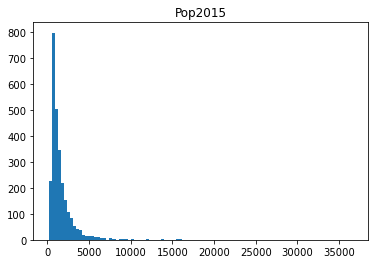

In [11]:
plt.hist(population_data['Pop2015'].values,bins=100)
plt.title('Pop2015')
plt.show()

In [12]:
population_data.groupby('PROV')['Pop2015']\
            .sum()\
            .sort_values(ascending=False)

PROV
Maguindanao                         1162435
Lanao Del Sur                       1045429
Sulu                                 824731
Tawi-Tawi                            390715
Basilan                              346579
Cotabato City (Not A Province)       299438
Lanao Del Norte                      159930
Cotabato (North Cotabato)            114369
City Of Isabela (Not A Province)     112788
Name: Pop2015, dtype: int64

In [13]:
population_data.groupby('MuniCities')['Pop2015']\
            .sum()\
            .sort_values(ascending=False)\
            .head(20)

MuniCities
Cotabato City                       299438
Marawi City                         201785
Parang                              149960
Jolo                                125564
City Of Isabela (Not A Province)    112788
Bongao                              100527
Datu Odin Sinsuat (Dinaig)           99210
Sultan Kudarat (Nuling)              95201
Indanan                              80883
Talipao                              80255
City Of Lamitan                      74782
Siasi                                67705
Patikul                              62287
Baloi                                58383
Upi                                  53583
Buluan                               50008
Wao                                  45862
Pikit                                45737
Panglima Sugala (Balimbing)          44184
Malabang                             43957
Name: Pop2015, dtype: int64

In [14]:
population_data.groupby('BrgyName')['Pop2015']\
            .sum()\
            .sort_values(ascending=False)\
            .head(20)

BrgyName
Poblacion               91896
Bus-bus                 36650
Asturias                23085
Tamontaka               22085
Poblacion II            20534
Bagua II                19720
Bagua                   18137
Anuling                 17504
Landasan (Sarmiento)    16971
San Raymundo            16143
Kalanganan              15995
Kajatian                15845
Rosary Heights X        15732
Poblacion VII           15712
Pindolonan              14619
Tulay                   14406
Dalican Poblacion       14094
Rosary Heights          13943
Bongao Poblacion        12503
Awang                   11897
Name: Pop2015, dtype: int64

## SDG-related Data

In [15]:
school_popn_files = ['Population 2010, 2015 ARMM,BCT.xlsx','Number of schools per brgy.xlsx']
sdg_files = [file for file in data_files if file not in school_popn_files]
sdg_files

['Condition(State of Repair)oftheBuilding(ARMM, 2010)Brgy.xlsx',
 'Construction Materials of the Roof (ARMM 2015)Brgy.xlsx',
 'Construction Materials of the Walls(ARMM 2015).xlsx',
 'Floor Area (ARMM, 2010) Brgy.xlsx',
 'Household Population by Ethnicity (ARMM, 2010) Brgy.xlsx',
 'Main Source of Water Supply for Cooking (ARMM 2015) Brgy.xlsx',
 'Main Source of Water Supply for Drinking (ARMM 2015) Brgy.xlsx',
 'Number of Households by Kind of Fuel for Lighting (ARMM 2015) Brgy.xlsx',
 'Tenure Status of the Lot (ARMM 2010) Brgy.xlsx',
 'Type of Building (ARMM 2015) Brgy.xlsx',
 'Year Built (ARMM 2010) Brgy.xlsx']

In [16]:
sdgs_data = []
for file in sdg_files:
    sdgs_data.append(pd.read_excel(TABULAR_PATH+file))
len(sdgs_data)

11

In [17]:
for df,name in zip(sdgs_data,sdg_files):
    print(name)
    display(df.head())
    with pd.option_context('display.max_rows', None): 
        display(get_info(df))

Condition(State of Repair)oftheBuilding(ARMM, 2010)Brgy.xlsx


,BRGY,PSGC,Total Occupied Housing Units,Needs No Repair/Needs Minor Repair,Needs Major Repair,Dilapidated/ Condemned,Under Renovation/ Being Repaired,Under Construction,Unfinished Construction,Not Applicable,Not Reported
0,Arco,PH150702001,167,135,17,3,0,4,1,0,7
1,Ba-as,PH150702002,233,112,41,0,5,4,64,0,7
2,Baimbing,PH150702004,94,90,2,0,0,0,1,0,1
3,Balagtasan,PH150702005,478,269,108,17,16,8,43,0,17
4,Balas,PH150702006,519,279,207,0,6,10,4,0,13


,count,unique,top,freq,mean,std,min,25%,50%,75%,max,dtypes,missing
BRGY,2490,2082,Pindolonan,17,NaN,NaN,NaN,NaN,NaN,NaN,NaN,object,0
PSGC,2490,2490,PH153638025,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,object,0
Total Occupied Housing Units,2490,NaN,NaN,NaN,200.903,234.757,14,78,147.5,245,5042,int64,0
Needs No Repair/Needs Minor Repair,2490,NaN,NaN,NaN,142.191,177.193,0,51,96,179,3751,int64,0
Needs Major Repair,2490,NaN,NaN,NaN,29.8538,51.2133,0,3,11,35,741,int64,0
Dilapidated/ Condemned,2490,NaN,NaN,NaN,1.15462,6.46757,0,0,0,0,142,int64,0
Under Renovation/ Being Repaired,2490,NaN,NaN,NaN,3.551,11.6864,0,0,0,3,300,int64,0
Under Construction,2490,NaN,NaN,NaN,2.5241,7.82007,0,0,0,2,215,int64,0
Unfinished Construction,2490,NaN,NaN,NaN,4.56265,15.1578,0,0,0,3,342,int64,0
Not Applicable,2490,NaN,NaN,NaN,0.0738956,2.35708,0,0,0,0,115,int64,0


Construction Materials of the Roof (ARMM 2015)Brgy.xlsx


,BRGY,PSGC,Total Occupied Housing Units,Galvanized iron/\naluminum,Tile/concrete/\nclay tile,Half galvanized iron and half concrete,Bamboo/\ncogon/ nipa/anahaw,Asbestos,Makeshift/ salvaged/ improvised materials,Trapal,Others,Not Reported
0,Arco,PH150702001,144,97,1,1,44,0,0,1,0,0
1,Ba-as,PH150702002,230,203,0,3,24,0,0,0,0,0
2,Baimbing,PH150702004,100,20,2,10,68,0,0,0,0,0
3,Balagtasan,PH150702005,427,16,55,188,167,0,1,0,0,0
4,Balas,PH150702006,546,371,0,4,168,0,3,0,0,0


,count,unique,top,freq,mean,std,min,25%,50%,75%,max,dtypes,missing
BRGY,2490,2082,Pindolonan,17,NaN,NaN,NaN,NaN,NaN,NaN,NaN,object,0
PSGC,2490,2490,PH153638025,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,object,0
Total Occupied Housing Units,2490,NaN,NaN,NaN,225.633,280.452,12,81,155,273.75,5090,int64,0
Galvanized iron/\naluminum,2490,NaN,NaN,NaN,135.42,201.572,0,42,84.5,158,3654,int64,0
Tile/concrete/\nclay tile,2490,NaN,NaN,NaN,5.21928,16.2438,0,0,0,3,228,int64,0
Half galvanized iron and half concrete,2490,NaN,NaN,NaN,16.2398,48.4418,0,0,1,8,726,int64,0
Bamboo/\ncogon/ nipa/anahaw,2490,NaN,NaN,NaN,66.8213,107.757,0,0,15,100,1307,int64,0
Asbestos,2490,NaN,NaN,NaN,0.682731,12.6607,0,0,0,0,461,int64,0
Makeshift/ salvaged/ improvised materials,2490,NaN,NaN,NaN,0.744578,8.78422,0,0,0,0,327,int64,0
Trapal,2490,NaN,NaN,NaN,0.277912,3.4229,0,0,0,0,116,int64,0


Construction Materials of the Walls(ARMM 2015).xlsx


,REG_PROV_CITY_MUNI_BRGY,PSGC,Total Occupied Housing Units,Concrete/brick/stone,Wood,Half concrete/\nbrick/stone and half wood,Galvanized iron/aluminum,Bamboo/\nsawali/cogon/nipa,Asbestos,Glass,Makeshift/\nsalvaged/\nimprovised materials,Trapal,Others,No walls,Not Reported
0,AUTONOMOUS REGION IN MUSLIM MINDANAO,PH150000000,561826,69021,278954,61785,7173,136591,1750,131,2182,674,279,196,3090
1,BASILAN,PH150700000,57704,5028,33625,5649,533,12211,297,21,157,71,14,8,90
2,CITY OF LAMITAN,PH150702000,14751,2721,6661,2211,83,2888,65,1,57,13,3,2,46
3,Arco,PH150702001,144,11,85,26,2,19,0,0,0,1,0,0,0
4,Ba-as,PH150702002,230,57,102,39,0,32,0,0,0,0,0,0,0


,count,unique,top,freq,mean,std,min,25%,50%,75%,max,dtypes,missing
REG_PROV_CITY_MUNI_BRGY,2614,2205,Pindolonan,17,NaN,NaN,NaN,NaN,NaN,NaN,NaN,object,0
PSGC,2614,2614,PH153638025,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,object,0
Total Occupied Housing Units,2614,NaN,NaN,NaN,859.718,12282.5,12,84,164,303,561826,int64,0
Concrete/brick/stone,2614,NaN,NaN,NaN,105.617,1569.8,0,2,10,33.75,69021,int64,0
Wood,2614,NaN,NaN,NaN,426.862,6036.33,0,30,74,160,278954,int64,0
Half concrete/\nbrick/stone and half wood,2614,NaN,NaN,NaN,94.5448,1422.27,0,1,7,29,61785,int64,0
Galvanized iron/aluminum,2614,NaN,NaN,NaN,10.9763,164.809,0,0,0,1,7173,int64,0
Bamboo/\nsawali/cogon/nipa,2614,NaN,NaN,NaN,209.015,3113.84,0,0,11,87,136591,int64,0
Asbestos,2614,NaN,NaN,NaN,2.67789,39.5099,0,0,0,0,1750,int64,0
Glass,2614,NaN,NaN,NaN,0.200459,2.93513,0,0,0,0,131,int64,0


Floor Area (ARMM, 2010) Brgy.xlsx


,REG_PROV_CITY_MUNI_BRGY,PSGC,Total Occupied Housing Units,Less than 5 sq.m./less than 54 sq.ft.,5-9 sq. m./ \n54-107 sq. ft.,10-19 sq. m./ 108-209 sq. ft.,20-29 sq. m./ 210-317 sq. ft.,30-49 sq. m./ 318-532 sq. ft.,50-69 sq. m./ 533-748 sq. ft.,70-89 sq. m./ 749-963 sq. ft.,"90-119 sq. m./ 964-1,286 sq. ft.","120-149 sq. m./ 1,287-1,609 sq. ft.","150-199 sq. m./ 1,610-2,147 sq. ft.","200 sq. m. and over/ 2,148 sq. ft. and over",Not Applicable,Not Reported
0,Arco,PH150702001,167,46,46,46,18,8,2,0,0,0,0,0,0,1
1,Ba-as,PH150702002,233,67,66,49,30,10,4,3,2,0,0,0,0,2
2,Baimbing,PH150702004,94,4,4,0,58,27,0,0,0,0,0,0,0,1
3,Balagtasan,PH150702005,478,1,86,152,167,50,13,4,0,0,0,0,0,5
4,Balas,PH150702006,519,32,153,245,67,9,4,2,0,0,0,0,0,7


,count,unique,top,freq,mean,std,min,25%,50%,75%,max,dtypes,missing
REG_PROV_CITY_MUNI_BRGY,2490,2082,Pindolonan,17,NaN,NaN,NaN,NaN,NaN,NaN,NaN,object,0
PSGC,2490,2490,PH153638025,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,object,0
Total Occupied Housing Units,2490,NaN,NaN,NaN,200.903,234.757,14,78,147.5,245,5042,int64,0
Less than 5 sq.m./less than 54 sq.ft.,2490,NaN,NaN,NaN,17.7133,48.7168,0,0,1,8,586,int64,0
5-9 sq. m./ \n54-107 sq. ft.,2490,NaN,NaN,NaN,29.6635,57.8422,0,0,6,33,973,int64,0
10-19 sq. m./ 108-209 sq. ft.,2490,NaN,NaN,NaN,41.8855,72.1342,0,3,17,51,1071,int64,0
20-29 sq. m./ 210-317 sq. ft.,2490,NaN,NaN,NaN,35.69,55.1845,0,4,17,47,886,int64,0
30-49 sq. m./ 318-532 sq. ft.,2490,NaN,NaN,NaN,24.5261,41.7981,0,2,9,29,595,int64,0
50-69 sq. m./ 533-748 sq. ft.,2490,NaN,NaN,NaN,16.9783,30.9949,0,1,6,19,379,int64,0
70-89 sq. m./ 749-963 sq. ft.,2490,NaN,NaN,NaN,9.88795,20.4146,0,0,2,10,280,int64,0


Household Population by Ethnicity (ARMM, 2010) Brgy.xlsx


,BRGY,PSGC,Total,Abelling/Abellen/Aberling/Aborlin,Adasen,Aeta/Ayta,Agta,Agta-Cimaron,Agta-Agay,Agta-Dumagat,...,Waray,Yakan,Yapayao,Yogad,Zambageño-Chavacano,Zambal,Other Local Ethnicity,American/ English,Other Foreign Ethnicity,Not Stated
0,Arco,PH150702001,800,0,0,0,0,0,0,0,...,0,26,0,0,414,0,0,0,0,0
1,Ba-as,PH150702002,1266,0,0,0,0,0,0,0,...,0,1263,0,0,0,0,0,0,0,3
2,Baimbing,PH150702004,451,0,0,0,0,0,0,0,...,0,450,0,0,1,0,0,0,0,0
3,Balagtasan,PH150702005,2597,0,0,0,0,0,0,0,...,0,1092,1,0,366,0,0,0,0,0
4,Balas,PH150702006,2809,0,0,0,0,0,0,0,...,0,159,0,0,1,0,0,0,0,0


,count,unique,top,freq,mean,std,min,25%,50%,75%,max,dtypes,missing
BRGY,2490,2082,Pindolonan,17,NaN,NaN,NaN,NaN,NaN,NaN,NaN,object,0
PSGC,2490,2490,PH153638025,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,object,0
Total,2490,NaN,NaN,NaN,1304.73,1472.71,136,595.25,965.5,1542.75,36622,int64,0
Abelling/Abellen/Aberling/Aborlin,2490,NaN,NaN,NaN,0.0253012,0.275857,0,0,0,0,8,int64,0
Adasen,2490,NaN,NaN,NaN,0.00441767,0.0825259,0,0,0,0,3,int64,0
Aeta/Ayta,2490,NaN,NaN,NaN,0.0140562,0.188573,0,0,0,0,6,int64,0
Agta,2490,NaN,NaN,NaN,0.00200803,0.100201,0,0,0,0,5,int64,0
Agta-Cimaron,2490,NaN,NaN,NaN,0.00843373,0.158872,0,0,0,0,5,int64,0
Agta-Agay,2490,NaN,NaN,NaN,0.00200803,0.0529938,0,0,0,0,2,int64,0
Agta-Dumagat,2490,NaN,NaN,NaN,0.00361446,0.115088,0,0,0,0,4,int64,0


Main Source of Water Supply for Cooking (ARMM 2015) Brgy.xlsx


,BRGY,PSGC,Number of Households,Own use faucet community water system,Shared faucet community water system,Own use tubed/piped deep well,Shared tubed/\npiped deep well,Tubed/\npiped shallow well,Dug well,Protected spring,Unprotected spring,Lake river rain and others,Peddler,Bottled water,Others
0,Arco,PH150702001,160,8,67,6,1,0,10,68,0,0,0,0,0
1,Ba-as,PH150702002,231,11,2,0,218,0,0,0,0,0,0,0,0
2,Baimbing,PH150702004,101,4,11,4,45,2,20,2,1,12,0,0,0
3,Balagtasan,PH150702005,434,45,313,15,60,0,0,0,0,1,0,0,0
4,Balas,PH150702006,546,3,9,6,201,315,5,0,0,3,0,3,1


,count,unique,top,freq,mean,std,min,25%,50%,75%,max,dtypes,missing
BRGY,2490,2082,Pindolonan,17,NaN,NaN,NaN,NaN,NaN,NaN,NaN,object,0
PSGC,2490,2490,PH153638025,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,object,0
Number of Households,2490,NaN,NaN,NaN,249.151,283.348,24,106,171,298.75,5144,int64,0
Own use faucet community water system,2490,NaN,NaN,NaN,28.8936,122.971,0,0,1,6,2393,int64,0
Shared faucet community water system,2490,NaN,NaN,NaN,33.8667,107.547,0,0,1,14.75,2545,int64,0
Own use tubed/piped deep well,2490,NaN,NaN,NaN,17.3357,56.2982,0,0,0,6,1151,int64,0
Shared tubed/\npiped deep well,2490,NaN,NaN,NaN,43.0996,100.27,0,0,1,36,1954,int64,0
Tubed/\npiped shallow well,2490,NaN,NaN,NaN,7.53655,34.0332,0,0,0,1,710,int64,0
Dug well,2490,NaN,NaN,NaN,53.5622,109.747,0,0,1,56,1193,int64,0
Protected spring,2490,NaN,NaN,NaN,14.8827,49.748,0,0,0,1,602,int64,0


Main Source of Water Supply for Drinking (ARMM 2015) Brgy.xlsx


,BRGY,PSGC,Number of Households,Own use faucet community water system,Shared faucet community water system,Own use tubed/piped deep well,Shared tubed/piped deep well,Tubed/piped shallow well,Dug well,Protected spring,Unprotected spring,"Lake, river, rain and others",Peddler,Bottled water,Others
0,Arco,PH150702001,160,8,67,6,1,0,10,68,0,0,0,0,0
1,Ba-as,PH150702002,231,12,2,0,215,0,0,2,0,0,0,0,0
2,Baimbing,PH150702004,101,2,14,4,48,0,21,0,0,12,0,0,0
3,Balagtasan,PH150702005,434,43,317,13,59,0,0,0,0,2,0,0,0
4,Balas,PH150702006,546,1,7,3,207,292,5,0,0,2,0,24,5


,count,unique,top,freq,mean,std,min,25%,50%,75%,max,dtypes,missing
BRGY,2490,2082,Pindolonan,17,NaN,NaN,NaN,NaN,NaN,NaN,NaN,object,0
PSGC,2490,2490,PH153638025,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,object,0
Number of Households,2490,NaN,NaN,NaN,249.151,283.348,24,106,171,298.75,5144,int64,0
Own use faucet community water system,2490,NaN,NaN,NaN,28.0245,118.552,0,0,1,6,2366,int64,0
Shared faucet community water system,2490,NaN,NaN,NaN,33.4137,105.216,0,0,1,15,2534,int64,0
Own use tubed/piped deep well,2490,NaN,NaN,NaN,17.1944,53.5829,0,0,0,6,1022,int64,0
Shared tubed/piped deep well,2490,NaN,NaN,NaN,43.6313,100.61,0,0,1,37,1904,int64,0
Tubed/piped shallow well,2490,NaN,NaN,NaN,7.02731,32.5633,0,0,0,1,702,int64,0
Dug well,2490,NaN,NaN,NaN,49.7803,103.898,0,0,1,47,1189,int64,0
Protected spring,2490,NaN,NaN,NaN,15.5667,50.9785,0,0,0,1,577,int64,0


Number of Households by Kind of Fuel for Lighting (ARMM 2015) Brgy.xlsx


,BRGY,PSGC,Number of HH,Electricity,Kerosene (Gaas),Liquified Petroleum Gas (LPG),Oil (vegetable animal and others),Solar panel,Solar lamp,Others,None,Not Reported
0,Arco,PH150702001,160,105,55,0,0,0,0,0,0,0
1,Ba-as,PH150702002,231,183,48,0,0,0,0,0,0,0
2,Baimbing,PH150702004,101,40,60,0,0,0,0,0,1,0
3,Balagtasan,PH150702005,434,378,55,0,0,1,0,0,0,0
4,Balas,PH150702006,546,393,129,1,0,0,1,22,0,0


,count,unique,top,freq,mean,std,min,25%,50%,75%,max,dtypes,missing
BRGY,2490,2082,Pindolonan,17,NaN,NaN,NaN,NaN,NaN,NaN,NaN,object,0
PSGC,2490,2490,PH153638025,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,object,0
Number of HH,2490,NaN,NaN,NaN,249.151,283.348,24,106,171,298.75,5144,int64,0
Electricity,2490,NaN,NaN,NaN,131.256,252.446,0,3,72,152,4657,int64,0
Kerosene (Gaas),2490,NaN,NaN,NaN,45.8639,85.3421,0,0,5,54,1053,int64,0
Liquified Petroleum Gas (LPG),2490,NaN,NaN,NaN,1.63293,12.0202,0,0,0,0,249,int64,0
Oil (vegetable animal and others),2490,NaN,NaN,NaN,0.480723,6.50091,0,0,0,0,273,int64,0
Solar panel,2490,NaN,NaN,NaN,28.2024,59.9402,0,0,1,28.75,633,int64,0
Solar lamp,2490,NaN,NaN,NaN,40.4948,74.6191,0,0,4,48,717,int64,0
Others,2490,NaN,NaN,NaN,0.500402,3.96563,0,0,0,0,90,int64,0


Tenure Status of the Lot (ARMM 2010) Brgy.xlsx


,BRGY,PSGC,Number of Household,Owned/being amortized,Rented,Rent-free with consent of owner,Rent-free without consent of owner,Not Applicable,Not Reported
0,Arco,PH150702001,167,142,0,24,0,0,1
1,Ba-as,PH150702002,233,163,3,60,2,0,5
2,Baimbing,PH150702004,94,71,6,17,0,0,0
3,Balagtasan,PH150702005,478,265,41,165,6,0,1
4,Balas,PH150702006,527,429,1,94,0,0,3


,count,unique,top,freq,mean,std,min,25%,50%,75%,max,dtypes,missing
BRGY,2490,2082,Pindolonan,17,NaN,NaN,NaN,NaN,NaN,NaN,NaN,object,0
PSGC,2490,2490,PH153638025,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,object,0
Number of Household,2490,NaN,NaN,NaN,216.442,237.898,26,94,159.5,258,5140,int64,0
Owned/being amortized,2490,NaN,NaN,NaN,160.33,184.595,0,70,113,195,4131,int64,0
Rented,2490,NaN,NaN,NaN,3.84779,22.0532,0,0,0,1,450,int64,0
Rent-free with consent of owner,2490,NaN,NaN,NaN,36.4976,68.2918,0,0,8,39,809,int64,0
Rent-free without consent of owner,2490,NaN,NaN,NaN,4.37791,18.5408,0,0,0,1,353,int64,0
Not Applicable,2490,NaN,NaN,NaN,6.63655,26.4551,0,0,0,2,390,int64,0
Not Reported,2490,NaN,NaN,NaN,4.75261,9.77973,0,0,2,5,130,int64,0


Type of Building (ARMM 2015) Brgy.xlsx


,BRGY,PSGC,Total Occupied Housing Units,Single house,Duplex,Multi-unit residential,Commercial/ industrial/ agricultural,Institutional living quarter,Others,Not Reported
0,Arco,PH150702001,144,142,2,0,0,0,0,0
1,Ba-as,PH150702002,230,201,28,0,0,0,0,1
2,Baimbing,PH150702004,100,100,0,0,0,0,0,0
3,Balagtasan,PH150702005,427,379,38,9,0,0,0,1
4,Balas,PH150702006,546,514,16,0,2,0,0,14


,count,unique,top,freq,mean,std,min,25%,50%,75%,max,dtypes,missing
BRGY,2490,2082,Pindolonan,17,NaN,NaN,NaN,NaN,NaN,NaN,NaN,object,0
PSGC,2490,2490,PH153638025,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,object,0
Total Occupied Housing Units,2490,NaN,NaN,NaN,225.633,280.452,12,81,155,273.75,5090,int64,0
Single house,2490,NaN,NaN,NaN,208.109,266.688,0,67,141,257,4711,int64,0
Duplex,2490,NaN,NaN,NaN,10.4064,24.2682,0,0,2,10,364,int64,0
Multi-unit residential,2490,NaN,NaN,NaN,5.44819,19.2284,0,0,0,0,256,int64,0
Commercial/ industrial/ agricultural,2490,NaN,NaN,NaN,0.268273,1.51738,0,0,0,0,44,int64,0
Institutional living quarter,2490,NaN,NaN,NaN,0.0369478,0.425484,0,0,0,0,15,int64,0
Others,2490,NaN,NaN,NaN,0.0192771,0.325108,0,0,0,0,13,int64,0
Not Reported,2490,NaN,NaN,NaN,1.34458,8.38278,0,0,0,0,310,int64,0


Year Built (ARMM 2010) Brgy.xlsx


,REG_PROV_CITY_MUNI_BRGY,PSGC,Total Occupied Housing Units,2010,2009,2008,2007,2006,2001-2005,1991-2000,1981-1990,1971-1980,1970 or earlier,Not Applicable,Don't Know,Not Reported
0,Arco,PH150702001,167,3,4,14,19,26,33,30,29,6,1,0,0,2
1,Ba-as,PH150702002,233,16,12,17,19,19,80,49,13,4,0,0,1,3
2,Baimbing,PH150702004,94,1,8,24,23,7,0,31,0,0,0,0,0,0
3,Balagtasan,PH150702005,478,7,34,46,33,43,113,106,45,23,21,0,4,3
4,Balas,PH150702006,519,24,23,33,23,32,95,116,112,44,12,0,3,2


,count,unique,top,freq,mean,std,min,25%,50%,75%,max,dtypes,missing
REG_PROV_CITY_MUNI_BRGY,2490,2082,Pindolonan,17,NaN,NaN,NaN,NaN,NaN,NaN,NaN,object,0
PSGC,2490,2490,PH153638025,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,object,0
Total Occupied Housing Units,2490,NaN,NaN,NaN,200.903,234.757,14,78,147.5,245,5042,int64,0
2010,2490,NaN,NaN,NaN,2.74137,9.29395,0,0,0,2,222,int64,0
2009,2490,NaN,NaN,NaN,7.17791,15.0384,0,0,2,8,217,int64,0
2008,2490,NaN,NaN,NaN,13.9759,25.0372,0,1,5,17,479,int64,0
2007,2490,NaN,NaN,NaN,16.5956,24.7369,0,2,8,21,317,int64,0
2006,2490,NaN,NaN,NaN,22.2032,31.1524,0,4,12,28,405,int64,0
2001-2005,2490,NaN,NaN,NaN,38.704,57.8083,0,8,21,47.75,946,int64,0
1991-2000,2490,NaN,NaN,NaN,40.6606,55.7369,0,11,24,50,1030,int64,0
